# CIND820 Big Data Analytics_M Samani

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

import tweepy
import csv
import pandas as pd
import sklearn
import random
import numpy as np
import pandas as pd
import yfinance as yf 
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
!{sys.executable} -m pip install treeinterpreter


####  Consumer key and access token for tweepy

In [4]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for United Airlines 

In [5]:
fetch_tweets=tweepy.Cursor(api.search, q="#unitedAIRLINES",count=100, lang ="en",since="2020-01-10", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

#### Data cleaning for each tweets

In [6]:
data.to_csv("Tweets.csv")
data

,Date,Tweets
0,2020-12-12,RT @NaimoJames: Part 2\n#unitedairlines https:...
1,2020-12-12,"I hope #UnitedAirlines go bust, the w*nkers!!!..."
2,2020-12-12,Bullshit #UnitedAirlines https://t.co/S0aWqDaI0n
3,2020-12-12,RT @SteveEmery03: This is turning into complet...
4,2020-12-12,RT @AshworthBrown: @megynkelly #UnitedAirlines...
...,...,...
691,2020-12-03,RT @DFWAirport: This #ThrowbackThursday from 2...
692,2020-12-03,RT @DFWAirport: This #ThrowbackThursday from 2...
693,2020-12-03,This #ThrowbackThursday from 2019 has us wishi...
694,2020-12-03,"@united To ensure passenger safety, Perhaps yo..."


In [7]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    Data1 = row["Date"]
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,"Date"] = Data1
    cdata.at[index,"Tweets"] = my_new_string

    index=index+1


#### Displaying dataset

In [8]:
cdata

,Date,Tweets
0,2020-12-12,RT NaimoJames Part 2unitedairlines httpstcoHHy...
1,2020-12-12,I hope UnitedAirlines go bust the wnkers https...
2,2020-12-12,Bullshit UnitedAirlines httpstcoS0aWqDaI0n
3,2020-12-12,RT SteveEmery03 This is turning into complete ...
4,2020-12-12,RT AshworthBrown megynkelly UnitedAirlines sho...
...,...,...
691,2020-12-03,RT DFWAirport This ThrowbackThursday from 2019...
692,2020-12-03,RT DFWAirport This ThrowbackThursday from 2019...
693,2020-12-03,This ThrowbackThursday from 2019 has us wishin...
694,2020-12-03,united To ensure passenger safety Perhaps your...


In [9]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])
print(ccdata)

Empty DataFrame
Columns: [Date, Tweets]
Index: []


#### Creating a dataframe for combining the tweets date 

In [10]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    get_tweet = cdata.Tweets.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        indx = indx+1
        ccdata.at[indx,"Date"] = get_date
        ccdata.at[indx,"Tweets"] = get_tweet
        get_tweet=" "

In [11]:
print(ccdata)

         Date                                             Tweets
1  2020-12-12  United Airlines Holdings Inc said on Friday av...
2  2020-12-11  RT diecastryan Working with United a few weeks...
3  2020-12-10  RT BoeingSCSpotter Two United 7879s N19986 amp...
4  2020-12-09  united DavidCornDC Aware Come on UnitedAirline...
5  2020-12-08  unitedAIRLINES terminal this evening at around...
6  2020-12-07  RT jfkjetsofficial A united Boeing 737 doing t...
7  2020-12-06  Sitting on a United Airlines Flight They say t...
8  2020-12-05  UnitedAirlines bans Hawaii couple that flew de...
9  2020-12-04  Stash Lets do this thing StashStockParty   One...


#### Getting closing price from "yahoo.finance"

In [12]:
start_date = '2019-12-06'
end_date = '2020-12-11' 
read_stock_p = yf.download('UAL',start_date,end_date)
#read_stock_p1.Date.iloc[:]

[*********************100%***********************]  1 of 1 completed


In [13]:
read_stock_p

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-06,88.790001,89.500000,88.550003,88.580002,88.580002,1485300
2019-12-09,88.489998,88.580002,87.300003,87.610001,87.610001,2160900
2019-12-10,87.580002,87.919998,86.360001,86.510002,86.510002,1994800
2019-12-11,86.470001,87.150002,86.080002,87.019997,87.019997,2418200
2019-12-12,87.699997,89.900002,87.320000,88.470001,88.470001,2903600
...,...,...,...,...,...,...
2020-12-04,50.490002,51.310001,48.770000,49.240002,49.240002,26300600
2020-12-07,49.279999,50.349998,48.709999,49.200001,49.200001,22364600
2020-12-08,49.020000,50.400002,48.720001,49.040001,49.040001,17797900


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [14]:
ccdata['prices']=""

In [15]:
indx=0
get_tweet_date =0
get_stock_date =0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        #get_stock_date=read_stock_p.Date.iloc[j]
        get_stock_date=read_stock_p.index[j].date()
       # print("good",i,get_stock_date,get_tweet_date)
        if(str(get_stock_date)==str(get_tweet_date)):
            print("Good",i,ccdata.Date.iloc[i],read_stock_p.Close[j])
           # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata.at[i+1,"prices"] = read_stock_p.Close[j]
    #print(ccdata)
            break

Good 2 2020-12-10 49.63999938964844
Good 3 2020-12-09 48.02000045776367
Good 4 2020-12-08 49.040000915527344
Good 5 2020-12-07 49.20000076293945
Good 8 2020-12-04 49.2400016784668


In [16]:
ccdata


,Date,Tweets,prices
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,
2,2020-12-11,RT diecastryan Working with United a few weeks...,
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04
6,2020-12-07,RT jfkjetsofficial A united Boeing 737 doing t...,49.2
7,2020-12-06,Sitting on a United Airlines Flight They say t...,
8,2020-12-05,UnitedAirlines bans Hawaii couple that flew de...,
9,2020-12-04,Stash Lets do this thing StashStockParty One...,49.24


#### Used  mean missing value

In [17]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.prices.iloc[i]!=''):
        summ=summ+ccdata.prices.iloc[i]
        count=count+1
mean=summ/count
#mean =np.mean()
for i in range(0,len(ccdata)):
    if(ccdata.prices.iloc[i]==""):
       # ccdata.Prices.iloc[i]=int(mean)
        ccdata.at[i+1,"prices"] = mean

In [18]:
mean

49.02800064086914

In [19]:
ccdata

,Date,Tweets,prices
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,49.028
2,2020-12-11,RT diecastryan Working with United a few weeks...,49.028
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04
6,2020-12-07,RT jfkjetsofficial A united Boeing 737 doing t...,49.2
7,2020-12-06,Sitting on a United Airlines Flight They say t...,49.028
8,2020-12-05,UnitedAirlines bans Hawaii couple that flew de...,49.028
9,2020-12-04,Stash Lets do this thing StashStockParty One...,49.24


#### Sentiment analysis, Adding: Comp is , negative, positive and neutral.

In [20]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,prices,Comp,Negative,Neutral,Positive
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,49.028,,,,
2,2020-12-11,RT diecastryan Working with United a few weeks...,49.028,,,,
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64,,,,
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02,,,,
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04,,,,
6,2020-12-07,RT jfkjetsofficial A united Boeing 737 doing t...,49.2,,,,
7,2020-12-06,Sitting on a United Airlines Flight They say t...,49.028,,,,
8,2020-12-05,UnitedAirlines bans Hawaii couple that flew de...,49.028,,,,
9,2020-12-04,Stash Lets do this thing StashStockParty One...,49.24,,,,


#### Calculation positive, negative, neutral and Comp for sentiment of the statement.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.at[indexx,"Comp"] = sentence_sentiment['compound']
        ccdata.at[indexx,"Negative"] = sentence_sentiment['neg']
        ccdata.at[indexx,"Neutral"] = sentence_sentiment['neu']
        ccdata.at[indexx,"Positive"] = sentence_sentiment['pos']

    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [22]:
ccdata

,Date,Tweets,prices,Comp,Negative,Neutral,Positive
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,49.028,-0.1531,0.077,0.86,0.063
2,2020-12-11,RT diecastryan Working with United a few weeks...,49.028,0.6633,0,0.809,0.191
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64,0.4215,0,0.851,0.149
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02,0.0201,0.242,0.549,0.209
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04,0,0,1,0
6,2020-12-07,RT jfkjetsofficial A united Boeing 737 doing t...,49.2,0.4215,0,0.891,0.109
7,2020-12-06,Sitting on a United Airlines Flight They say t...,49.028,0.8109,0.075,0.708,0.216
8,2020-12-05,UnitedAirlines bans Hawaii couple that flew de...,49.028,-0.4449,0.245,0.755,0
9,2020-12-04,Stash Lets do this thing StashStockParty One...,49.24,0.4404,0,0.861,0.139


#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  66.66666666666666
% of negative tweets=  22.22222222222222


[]

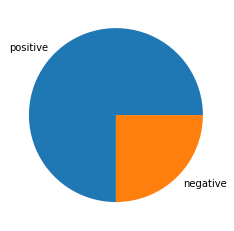

In [23]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp.iloc[i]
   # print(get_val)
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe for machine learning.

In [24]:
df_=ccdata.copy()

In [25]:
df_

,Date,Tweets,prices,Comp,Negative,Neutral,Positive
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,49.028,-0.1531,0.077,0.86,0.063
2,2020-12-11,RT diecastryan Working with United a few weeks...,49.028,0.6633,0,0.809,0.191
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64,0.4215,0,0.851,0.149
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02,0.0201,0.242,0.549,0.209
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04,0,0,1,0
6,2020-12-07,RT jfkjetsofficial A united Boeing 737 doing t...,49.2,0.4215,0,0.891,0.109
7,2020-12-06,Sitting on a United Airlines Flight They say t...,49.028,0.8109,0.075,0.708,0.216
8,2020-12-05,UnitedAirlines bans Hawaii couple that flew de...,49.028,-0.4449,0.245,0.755,0
9,2020-12-04,Stash Lets do this thing StashStockParty One...,49.24,0.4404,0,0.861,0.139


#### Dividing the dataset into train and test.

In [26]:
train_start_index = 0
train_end_index = 5
test_start_index = 6
test_end_index = 9
train = df_.iloc[train_start_index : train_end_index]
test = df_.iloc[test_start_index:test_end_index]

In [27]:
train

,Date,Tweets,prices,Comp,Negative,Neutral,Positive
1,2020-12-12,United Airlines Holdings Inc said on Friday av...,49.028,-0.1531,0.077,0.86,0.063
2,2020-12-11,RT diecastryan Working with United a few weeks...,49.028,0.6633,0,0.809,0.191
3,2020-12-10,RT BoeingSCSpotter Two United 7879s N19986 amp...,49.64,0.4215,0,0.851,0.149
4,2020-12-09,united DavidCornDC Aware Come on UnitedAirline...,48.02,0.0201,0.242,0.549,0.209
5,2020-12-08,unitedAIRLINES terminal this evening at around...,49.04,0,0,1,0


#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [28]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [29]:
print(numpy_df_train)

[[0.077 0.063]
 [0.    0.191]
 [0.    0.149]
 [0.242 0.209]
 [0.    0.   ]]


#### Making a 2D array for Negative and Positive sentiment for Testing dataset.

In [30]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [31]:
print(numpy_df_test)

[[0.075 0.216]
 [0.245 0.   ]
 [0.    0.139]]


#### Making 2 dataframe for Training and Testing "Prices"

In [32]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])
print(y_train)


   prices
1  49.028
2  49.028
3   49.64
4   48.02
5   49.04


In [33]:
print(y_test)

   prices
7  49.028
8  49.028
9   49.24


#### Fitting the sentiments

In [34]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

RandomForestRegressor()

#### Making Predictions

In [35]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [36]:
print(prediction)

[[48.73664046]
 [48.72188065]
 [49.34695993]]


In [37]:
prediction[0:]

array([[48.73664046],
       [48.72188065],
       [49.34695993]])

#### Importing matplotlib library for plotting graph

In [38]:
idx=np.arange(int(test_start_index+1),int(test_end_index)+1)
idx

array([7, 8, 9])

#### Defining index position for the test data. Making dataframe for the predicted value.

In [39]:
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [40]:
predictions_df_

,Prices
7,48.736640
8,48.721881
9,49.346960


#### Plotting the graph for the Predicted_price VS Actual Price

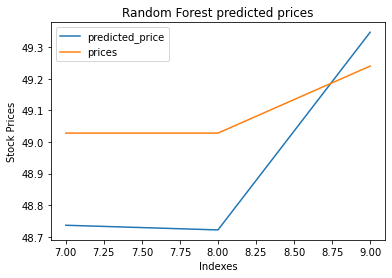

In [41]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [42]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [43]:
predicted_priceLR = reg.predict(numpy_df_test)
predicted_priceLR
predictions_dfLR_ = pd.DataFrame(data=predicted_priceLR[0:], index = idx, columns=['Prices'])
predictions_dfLR_

,Prices
7,48.927160
8,47.983317
9,49.282617


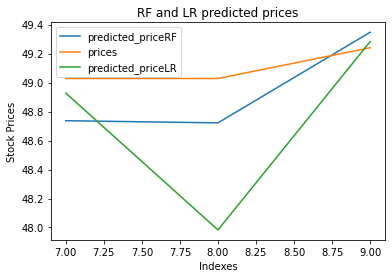

In [44]:
ax = predictions_df_.rename(columns={"Prices": "predicted_priceRF"}).plot(title='RF and LR predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig = predictions_dfLR_.rename(columns={"Prices": "predicted_priceLR"}).plot(ax = ax).get_figure()#actual value

fig.savefig("random forest.png")

In [45]:
predicted_priceLR

array([[48.92716004],
       [47.98331714],
       [49.28261683]])

In [46]:
y_test

,prices
7,49.028
8,49.028
9,49.24


### New dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


In [47]:
path = os.getcwd()
stocks_dataf = pd.read_pickle('Twitter_Dataset.pkl')

stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

## New dataset

In [48]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


#### Removing dot (.) and space from the Tweets

In [49]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

,adj_close_price,Tweets
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...
2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [50]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [51]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
...,...,...,...,...,...
2016-12-27,19945,,,,
2016-12-28,19833,,,,
2016-12-29,19819,,,,
2016-12-30,19762,,,,


In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in stocks_dataf.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        
        dataframe.at[indexx,"Comp"] = sentence_sentiment['compound']
        dataframe.at[indexx,"Negative"] = sentence_sentiment['neg']
        dataframe.at[indexx,"Neutral"] = sentence_sentiment['neu']
        dataframe.at[indexx,"Positive"] = sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [54]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8521,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
...,...,...,...,...,...
2016-12-27,19945,-0.9898,0.178,0.719,0.103
2016-12-28,19833,-0.6072,0.132,0.76,0.108
2016-12-29,19819,-0.9782,0.14,0.761,0.099
2016-12-30,19762,-0.995,0.168,0.734,0.098


% of positive tweets=  44.2102381604161
% of negative tweets=  55.57076375581713


[]

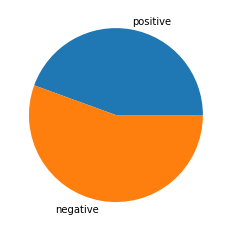

In [55]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()




In [56]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8521,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
...,...,...,...,...,...
2016-12-27,19945,-0.9898,0.178,0.719,0.103
2016-12-28,19833,-0.6072,0.132,0.76,0.108
2016-12-29,19819,-0.9782,0.14,0.761,0.099
2016-12-30,19762,-0.995,0.168,0.734,0.098


In [57]:

 
lent= len(dataframe)
train_data_start =0
train_data_end  =int(0.8*lent)
test_data_start = int(0.8*lent)
test_data_end = lent

train = dataframe.iloc[train_data_start : train_data_end]
test = dataframe.iloc[test_data_start:test_data_end]


In [58]:
lent

3653

In [59]:
train

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8521,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
...,...,...,...,...,...
2014-12-27,18048,-0.9843,0.185,0.702,0.113
2014-12-28,18043,-0.9943,0.188,0.755,0.056
2014-12-29,18038,-0.9951,0.172,0.751,0.076
2014-12-30,17983,-0.1154,0.166,0.695,0.14


In [60]:
dataframe.index[lent-1]

Timestamp('2016-12-31 00:00:00', freq='D')

In [61]:
test

,adj_close_price,Comp,Negative,Neutral,Positive
2015-01-01,17828,-0.8552,0.138,0.733,0.129
2015-01-02,17832,-0.9775,0.149,0.759,0.093
2015-01-03,17722,-0.977,0.133,0.785,0.082
2015-01-04,17612,-0.9971,0.22,0.716,0.064
2015-01-05,17501,-0.9905,0.156,0.767,0.077
...,...,...,...,...,...
2016-12-27,19945,-0.9898,0.178,0.719,0.103
2016-12-28,19833,-0.6072,0.132,0.76,0.108
2016-12-29,19819,-0.9782,0.14,0.761,0.099
2016-12-30,19762,-0.995,0.168,0.734,0.098


In [62]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [63]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [64]:
len(numpy_dataframe_train)

2922

In [65]:
len(numpy_dataframe_test)

731

In [66]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])


In [67]:
y_train

,adj_close_price
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
...,...
2014-12-27,18048
2014-12-28,18043
2014-12-29,18038
2014-12-30,17983


In [68]:
y_test

,adj_close_price
2015-01-01,17828
2015-01-02,17832
2015-01-03,17722
2015-01-04,17612
2015-01-05,17501
...,...
2016-12-27,19945
2016-12-28,19833
2016-12-29,19819
2016-12-30,19762


In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [70]:
idx=np.arange(int(test_data_start+1),int(test_data_end)+1)
idx
y_test['idx']="" 

In [71]:
y_test1 = y_test.set_index("idx",drop =False)

In [72]:
idx = int(0.8*lent)

for i in range(0,len(y_test)):
    y_test1.idx.iloc[i]= idx
    idx = idx+1
      

In [73]:
y_test1.adj_close_price

idx
2922    17828
2923    17832
2924    17722
2925    17612
2926    17501
        ...  
3648    19945
3649    19833
3650    19819
3651    19762
3652    19762
Name: adj_close_price, Length: 731, dtype: int64

0.0
0.2836645280801898


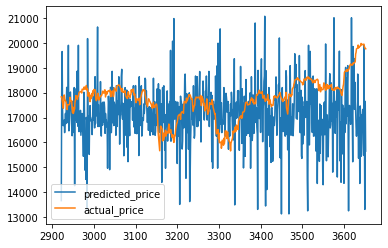

In [74]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
#idx = pd.date_range(test_data_start, test_data_end)
idx=np.arange(int(test_data_start),int(test_data_end))
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
#test_start_index
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = y_test1.adj_close_price
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

In [75]:
predictions_df

,predicted_price,actual_price
2922,13664,17828
2923,18125,17832
2924,19650,17722
2925,17352,17612
2926,16682,17501
...,...,...
3648,19901,19945
3649,16530,19833
3650,13311,19819
3651,17649,19762


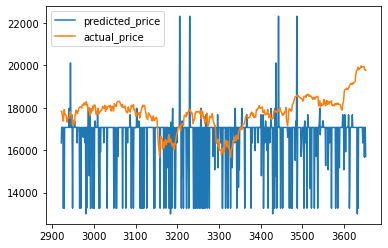

In [76]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx=np.arange(int(test_data_start),int(test_data_end))
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] +4500
predictions_df['actual_value'] = y_test1.adj_close_price
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()


In [77]:
print(mlpc.score(numpy_dataframe_train, train['adj_close_price']))
print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))

0.007529089664613279
0.0013679890560875513


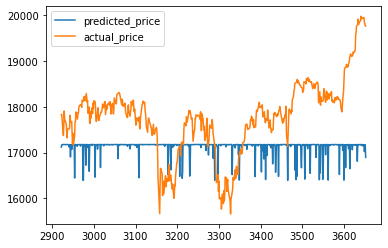

In [78]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx=np.arange(int(test_data_start),int(test_data_end))
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = y_test1.adj_close_price
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [79]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8521,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
...,...,...,...,...,...
2016-12-27,19945,-0.9898,0.178,0.719,0.103
2016-12-28,19833,-0.6072,0.132,0.76,0.108
2016-12-29,19819,-0.9782,0.14,0.761,0.099
2016-12-30,19762,-0.995,0.168,0.734,0.098
